### No.1
'''
A = [[3,-1,2],[1,1,2],[2,-2,-1]],
b = [7, 9, -5]
'''

In [1]:
from gauss_jordan import *

In [2]:
A = [[3,-1,2],[1,1,2],[2,-2,-1]]
b = [7, 9, -5]

In [3]:
x = gauss_jordan(A,b)
print(x)

[1.0, 2.0, 3.0]
None


In [4]:
def pprint(A):
    n = len(A)
    for i in range(0, n):
        line = ""
        for j in range(0, n+1):
            line += str(A[i][j]) + "\t"
            if j == n-1:
                line += "| "
        print(line)
    print("")


def gauss(A):
    n = len(A)

    for i in range(0, n):
        # Search for maximum in this column
        maxEl = abs(A[i][i])
        maxRow = i
        for k in range(i+1, n):
            if abs(A[k][i]) > maxEl:
                maxEl = abs(A[k][i])
                maxRow = k

        # Swap maximum row with current row (column by column)
        for k in range(i, n+1):
            tmp = A[maxRow][k]
            A[maxRow][k] = A[i][k]
            A[i][k] = tmp

        # Make all rows below this one 0 in current column
        for k in range(i+1, n):
            c = -A[k][i]/A[i][i]
            for j in range(i, n+1):
                if i == j:
                    A[k][j] = 0
                else:
                    A[k][j] += c * A[i][j]

    # Solve equation Ax=b for an upper triangular matrix A
    x = [0 for i in range(n)]
    for i in range(n-1, -1, -1):
        x[i] = A[i][n]/A[i][i]
        for k in range(i-1, -1, -1):
            A[k][n] -= A[k][i] * x[i]
    return x

In [5]:
A = [[3,-1,2,7],[1,1,2,9],[2,-2,-1,-5]]
x = gauss(A)
# Print result
line = "Result:\t"
for i in range(0, 3):
    line += str(x[i]) + "\t"
print(line)

Result:	1.0	2.0	3.0	


### No.2 
'''
#### A = [[3,-1,2],[1,1,2],[3,-2,-1]]
### inverse(A) = ?

In [6]:
from inverse_fr import *
from ppmat import *

size = 3

# We want to invert the following matrix:

toInverse = [[0 for j in range(size)] for i in range(size)]
toInverse[0] = [3, -1, 2]
toInverse[1] = [1, 1, 2]
toInverse[2] = [3, -2, -1]
final = inverse_fr(toInverse)
print("--------------------------")
ppmat(final)


    3   ,    -1   ,     2   ,     1   ,     0   ,     0   
    1   ,     1   ,     2   ,     0   ,     1   ,     0   
    3   ,    -2   ,    -1   ,     0   ,     0   ,     1   

    1   ,  -2/3   ,  -1/3   ,     0   ,     0   ,   1/3   
    1   ,     1   ,     2   ,     0   ,     1   ,     0   
    3   ,    -1   ,     2   ,     1   ,     0   ,     0   

    1   ,  -2/3   ,  -1/3   ,     0   ,     0   ,   1/3   
    1   ,     1   ,     2   ,     0   ,     1   ,     0   
    3   ,    -1   ,     2   ,     1   ,     0   ,     0   

    1   ,  -2/3   ,  -1/3   ,     0   ,     0   ,   1/3   
    0   ,   5/3   ,   7/3   ,     0   ,     1   ,  -1/3   
    3   ,    -1   ,     2   ,     1   ,     0   ,     0   

    1   ,  -2/3   ,  -1/3   ,     0   ,     0   ,   1/3   
    0   ,     1   ,     3   ,     1   ,     0   ,    -1   
    0   ,   5/3   ,   7/3   ,     0   ,     1   ,  -1/3   

    1   ,     0   ,   5/3   ,   2/3   ,     0   ,  -1/3   
    0   ,     1   ,     3   ,     1   ,     0   , 

In [7]:
import numpy as np
c = np.dot(toInverse,final)
ppmat(toInverse)
print("--------------------------")
ppmat(final)
print("==========================")
ppmat(c)


    3   ,    -1   ,     2   
    1   ,     1   ,     2   
    3   ,    -2   ,    -1   
--------------------------

 -3/8   ,   5/8   ,   1/2   
 -7/8   ,   9/8   ,   1/2   
  5/8   ,  -3/8   ,  -1/2   

    1   ,     0   ,     0   
    0   ,     1   ,     0   
    0   ,     0   ,     1   


### No. 3 '''
A = [[2,6,10],[1,3,3],[3,14,28]]
b = [0,2,-8]
'''

In [8]:
from gauss_jordan import *
A = [[2,6,10],[1,3,3],[3,14,28]]
b = [0,2,-8]

In [9]:
x = gauss_jordan(A,b)

[2.0000000000000013, 0.9999999999999992, -0.9999999999999998]


### No.4 y = x**4-0.25

In [10]:
from bisectionx import *
from secantx import *
from newtonx import *
def f(x):
    return x**4-0.25

In [11]:
def fpr(x):
    return 3*x**3

In [12]:
# 二分法
from prettytable import PrettyTable
import matplotlib.pyplot as plt

x,logdat = bisectionx(f, 0,2, tol = 1.0e-5)
print('x = ','{:6.4f}'.format(x))

printx = PrettyTable(["a","b","m","ya","yb","ym" ])
printx.padding_width = 1
for a,b,m,f1,f2,f3 in logdat:
    printx.add_row([a,b,m,f1,f2,f3])   
print(printx)


x =  0.7071
+--------+--------+--------+---------+--------+---------+
|   a    |   b    |   m    |    ya   |   yb   |    ym   |
+--------+--------+--------+---------+--------+---------+
|   0    |   2    |  1.0   |  -0.25  | 15.75  |   0.75  |
|   0    |  1.0   |  0.5   |  -0.25  |  0.75  | -0.1875 |
|  0.5   |  1.0   |  0.75  | -0.1875 |  0.75  |  0.0664 |
|  0.5   |  0.75  | 0.625  | -0.1875 | 0.0664 | -0.0974 |
| 0.625  |  0.75  | 0.6875 | -0.0974 | 0.0664 | -0.0266 |
| 0.6875 |  0.75  | 0.7188 | -0.0266 | 0.0664 |  0.0169 |
| 0.6875 | 0.7188 | 0.7031 | -0.0266 | 0.0169 | -0.0056 |
| 0.7031 | 0.7188 | 0.7109 | -0.0056 | 0.0169 |  0.0055 |
| 0.7031 | 0.7109 | 0.707  | -0.0056 | 0.0055 | -0.0001 |
| 0.707  | 0.7109 | 0.709  | -0.0001 | 0.0055 |  0.0027 |
| 0.707  | 0.709  | 0.708  | -0.0001 | 0.0027 |  0.0013 |
| 0.707  | 0.708  | 0.7075 | -0.0001 | 0.0013 |  0.0006 |
| 0.707  | 0.7075 | 0.7073 | -0.0001 | 0.0006 |  0.0002 |
| 0.707  | 0.7073 | 0.7072 | -0.0001 | 0.0002 |  0.0001 |
| 

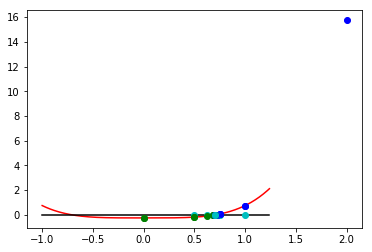

In [13]:
import matplotlib.pyplot as plt
t = np.arange(-1,1.25,.01)
n = np.copy(t)
n.fill(0)
plt.plot(t, f(t), 'r')
plt.plot(t,n,'k')
for a,b,m,f1,f2,f3 in logdat:
    plt.plot(a,f1,'go')
    plt.plot(b,f2,'bo')
    plt.plot(m,0,'co')
plt.show()

In [14]:
# 正割法
x,logdat = secantx(f, 0,1,30, tol = 1.0e-5)
#print('x = ','{:6.4f}'.format(ans))
from prettytable import PrettyTable
import matplotlib.pyplot as plt
printx = PrettyTable(["a","b","m","yb" ])
printx.padding_width = 1
for a,b,m,f1 in logdat:
    printx.add_row([a,b,m,f1])   
print(printx)



+--------+--------+--------+---------+
|   a    |   b    |   m    |    yb   |
+--------+--------+--------+---------+
|   0    |   1    |  0.25  | -0.2461 |
|   1    |  0.25  | 0.4353 | -0.2141 |
|  0.25  | 0.4353 | 1.6751 |  7.6241 |
| 0.4353 | 1.6751 | 0.4692 | -0.2016 |
| 1.6751 | 0.4692 | 0.5002 | -0.1874 |
| 0.4692 | 0.5002 | 0.9112 |  0.4395 |
| 0.5002 | 0.9112 | 0.6231 | -0.0993 |
| 0.9112 | 0.6231 | 0.6762 | -0.0409 |
| 0.6231 | 0.6762 | 0.7135 |  0.0091 |
| 0.6762 | 0.7135 | 0.7067 | -0.0006 |
| 0.7135 | 0.7067 | 0.7071 |   -0.0  |
+--------+--------+--------+---------+


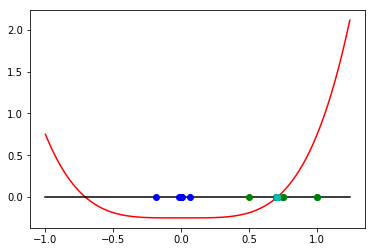

In [20]:
import matplotlib.pyplot as plt
t = np.arange(-1,1.25,.01)
n = np.copy(t)
n.fill(0)
plt.plot(t, f(t), 'r')
plt.plot(t,n,'k')
for a,b,m,yb in logdat:
    plt.plot(a,0,'go')
    plt.plot(b,0,'bo')
    plt.plot(m,0,'co')
plt.show()

In [15]:
# 牛頓法
x,logdat = newtonx(f,fpr,0.5,10,tol = 1.0e-4)
print('x = ','{:8.6f}'.format(x))
printx = PrettyTable(["x","y","x_temp","y_temp" ])
printx.padding_width = 1
for x,y,x_temp,y_temp in logdat:
    printx.add_row([x,y,x_temp,y_temp])   
print(printx)

x =  0.707149
+--------------------+-------------------------+--------------------+-------------------------+
|         x          |            y            |       x_temp       |          y_temp         |
+--------------------+-------------------------+--------------------+-------------------------+
|        0.5         |         -0.1875         |        1.0         |           0.75          |
|        1.0         |           0.75          |        0.75        |        0.06640625       |
|        0.75        |        0.06640625       | 0.6975308641975309 |  -0.013269772336434199  |
| 0.6975308641975309 |  -0.013269772336434199  | 0.7105640903257011 |   0.004925349461462447  |
| 0.7105640903257011 |   0.004925349461462447  | 0.705987879463693  |  -0.0015786141287178201 |
| 0.705987879463693  |  -0.0015786141287178201 | 0.7074832988124421 |  0.0005329017805741354  |
| 0.7074832988124421 |  0.0005329017805741354  | 0.7069816759291347 | -0.00017687860331902505 |
| 0.7069816759291347 | -0.

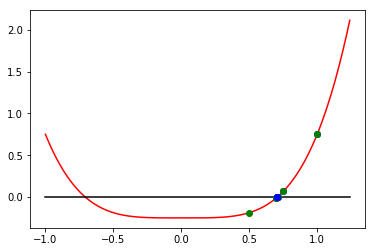

In [16]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-1.0,1.25,.01)
n = np.copy(t)
n.fill(0)
plt.plot(t, f(t), 'r')
plt.plot(t,n,'k')
for x,y,x_temp,y_temp in logdat:
    plt.plot(x,y,'go')
    plt.plot(x_temp,y_temp,'bo')
plt.show()